In [2]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import geopandas as gpd
import matplotlib.image as mpimg
from shapely.geometry import Point, LineString

/var/folders/5v/6m86_sq94nx_xsn4trty92j00000gn/T/ipykernel_14525/4203099707.py:50: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf_connections.plot(ax=ax, color='blue', linestyle='-', linewidth=2, label='Highways')


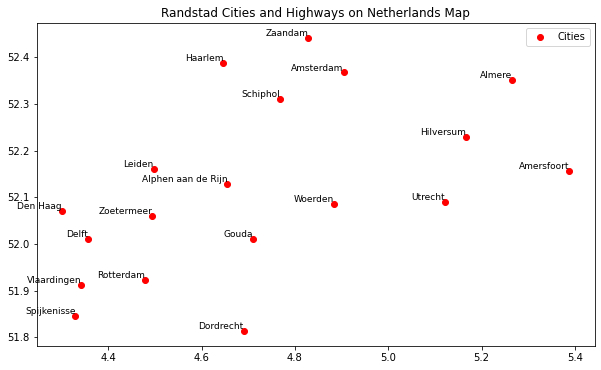

In [3]:
# Your cities and their geographical coordinates
cities_coords = {
    "Zaandam": (52.442, 4.829),
    "Amsterdam": (52.3676, 4.9041),
    "Haarlem": (52.3874, 4.6462),
    "Schiphol": (52.3105, 4.7683),
    "Leiden": (52.1601, 4.4970),
    "Den Haag": (52.0705, 4.3007),
    "Zoetermeer": (52.0607, 4.4940),
    "Delft": (52.0116, 4.3571),
    "Rotterdam": (51.9225, 4.4792),
    "Spijkenisse": (51.8453, 4.3297),
    "Dordrecht": (51.8133, 4.6901),
    "Vlaardingen": (51.9125, 4.3417),
    "Alphen aan de Rijn": (52.1292, 4.6555),
    "Gouda": (52.0116, 4.7105),
    "Woerden": (52.0850, 4.8836),
    "Utrecht": (52.0907, 5.1214),
    "Hilversum": (52.2292, 5.1669),
    "Almere": (52.3508, 5.2647),
    "Amersfoort": (52.1561, 5.3878),
}

connections = [
    # Add connections here
]
    
# Convert your city coordinates to a GeoDataFrame
gdf_cities = gpd.GeoDataFrame({
    'city': cities_coords.keys(),
    'geometry': [Point(xy[1], xy[0]) for xy in cities_coords.values()]  # Note the (longitude, latitude) order
})

# Create a GeoDataFrame for connections
gdf_connections = gpd.GeoDataFrame({
    'geometry': [LineString([Point(cities_coords[connection[0]]), Point(cities_coords[connection[1]])]) for connection in connections]
})
# Load the PNG image
img = mpimg.imread('SnelwegenNederland_2008.png')

# Create a single figure context for both the image and the plots
fig, ax = plt.subplots(figsize=(10, 15))

# Plot the image
#ax.imshow(img, extent=[4, 6, 50.5, 53.5])  # You might need to adjust the extent to fit your image
#ax.imshow(img, extent=[3, 7, 50.5, 53.5]) 
# Plot cities on top of the image
gdf_cities.plot(ax=ax, marker='o', color='red', label='Cities')
# Plot connections
gdf_connections.plot(ax=ax, color='blue', linestyle='-', linewidth=2, label='Highways')
# Annotate each city with its name
for city, coord in cities_coords.items():
    ax.text(coord[1], coord[0], city, fontsize=9, ha='right', va='bottom')

# Customize plot
ax.set_title('Randstad Cities and Highways on Netherlands Map')
plt.legend()

plt.show()